# Branches - Balanced 3 category

In [1]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train_we = np.load('../Semantics/data/train_we_(32193, 120).npy')
test_we = np.load('../Semantics/data/test_we_(1613, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_fake_train = np.load('../dataset/data/train_label_(32193, 2).npy')
y_fake_test = np.load('../dataset/data/test_label_(1613, 2).npy')

train_we.shape, test_we.shape, y_fake_train.shape, y_fake_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2))

## Bilinear

In [2]:
from TextModels import BiGRU
from TextTransferModels import TwoBranchesBiGRU
from train import train

related_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                      output=3, gradient_reversal=False).model
unrelated_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                        output=3, gradient_reversal=True).model

related_model.load_weights(
    './model/Branches_Balanced3_BiGRU_RelatedBranch_useClassWeight.hdf5')
unrelated_model.load_weights(
    './model/Branches_Balanced3_BiGRU_UnrelatedBranch_useClassWeight.hdf5')

model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='bilinear').model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py




Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead





/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


Instructions for updating:
dim is deprecated, use axis instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
________________________________________________________

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 120, 64)      63936       embedding_4[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_4 (Glo (None, 64)           0           bidirectional_4[0][0]            
__________________________________________________________________________________________________
global_max

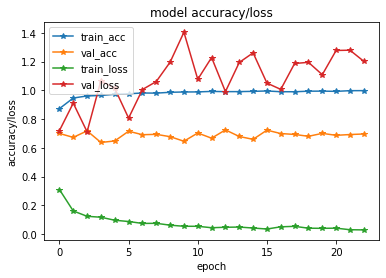


TEST_sz: 1613

Accuracy: 0.7247365158090514

              precision    recall  f1-score   support

       truth      0.682     0.941     0.791       891
       rumor      0.862     0.458     0.599       722

   micro avg      0.725     0.725     0.725      1613
   macro avg      0.772     0.699     0.695      1613
weighted avg      0.762     0.725     0.705      1613
 samples avg      0.725     0.725     0.725      1613




In [3]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='bilinear').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_bilinear', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 120, 64)      63936       embedding_5[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_5 (Glo (None, 64)           0           bidirectional_5[0][0]            
__________________________________________________________________________________________________
global_max

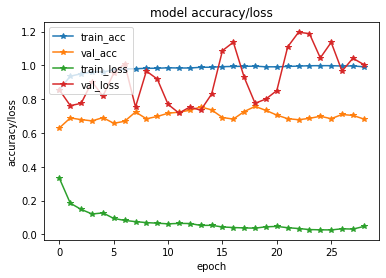


TEST_sz: 1613

Accuracy: 0.7569745815251085

              precision    recall  f1-score   support

       truth      0.748     0.844     0.793       891
       rumor      0.771     0.650     0.705       722

   micro avg      0.757     0.757     0.757      1613
   macro avg      0.760     0.747     0.749      1613
weighted avg      0.759     0.757     0.754      1613
 samples avg      0.757     0.757     0.757      1613




In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='bilinear').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_bilinear2', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (None, 120, 64)      63936       embedding_6[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_6 (Glo (None, 64)           0           bidirectional_6[0][0]            
__________________________________________________________________________________________________
global_max

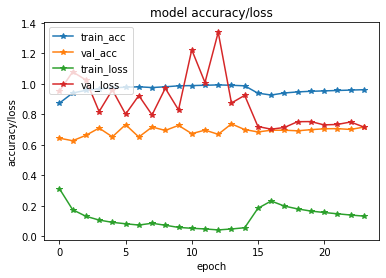


TEST_sz: 1613

Accuracy: 0.7377557346559206

              precision    recall  f1-score   support

       truth      0.705     0.902     0.792       891
       rumor      0.816     0.535     0.646       722

   micro avg      0.738     0.738     0.738      1613
   macro avg      0.761     0.718     0.719      1613
weighted avg      0.755     0.738     0.727      1613
 samples avg      0.738     0.738     0.738      1613




In [5]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='bilinear').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_bilinear3', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 120, 64)      63936       embedding_7[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_7 (Glo (None, 64)           0           bidirectional_7[0][0]            
__________________________________________________________________________________________________
global_max

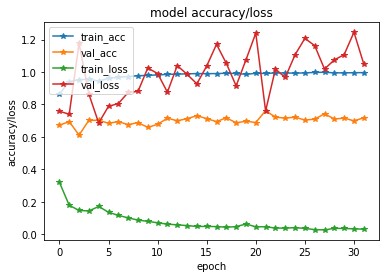


TEST_sz: 1613

Accuracy: 0.7619342839429635

              precision    recall  f1-score   support

       truth      0.759     0.834     0.795       891
       rumor      0.767     0.673     0.717       722

   micro avg      0.762     0.762     0.762      1613
   macro avg      0.763     0.754     0.756      1613
weighted avg      0.762     0.762     0.760      1613
 samples avg      0.762     0.762     0.762      1613




In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='bilinear').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_bilinear4', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 120, 64)      63936       embedding_8[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_8 (Glo (None, 64)           0           bidirectional_8[0][0]            
__________________________________________________________________________________________________
global_max

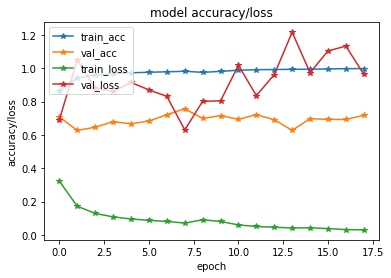


TEST_sz: 1613

Accuracy: 0.7563546187228767

              precision    recall  f1-score   support

       truth      0.738     0.868     0.797       891
       rumor      0.791     0.619     0.695       722

   micro avg      0.756     0.756     0.756      1613
   macro avg      0.764     0.743     0.746      1613
weighted avg      0.762     0.756     0.751      1613
 samples avg      0.756     0.756     0.756      1613




In [7]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='bilinear').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_bilinear5', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

## Attention

In [2]:
from TextModels import BiGRU
from TextTransferModels import TwoBranchesBiGRU
from train import train

related_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                      output=3, gradient_reversal=False).model
unrelated_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                        output=3, gradient_reversal=True).model

related_model.load_weights(
    './model/Branches_Balanced3_BiGRU_RelatedBranch_useClassWeight.hdf5')
unrelated_model.load_weights(
    './model/Branches_Balanced3_BiGRU_UnrelatedBranch_useClassWeight.hdf5')

model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='attention').model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py




Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead





/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 120, 64)      63936       embedding_4[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_4 (Glo (None, 64)           0           bidirectional_4[0][0]            
__________________________________________________________________________________________________
global_max

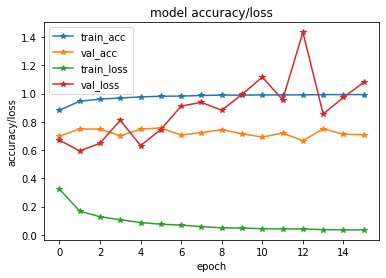


TEST_sz: 1613

Accuracy: 0.7569745815251085

              precision    recall  f1-score   support

       truth      0.719     0.918     0.807       891
       rumor      0.847     0.558     0.673       722

   micro avg      0.757     0.757     0.757      1613
   macro avg      0.783     0.738     0.740      1613
weighted avg      0.776     0.757     0.747      1613
 samples avg      0.757     0.757     0.757      1613




In [3]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='attention').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_attention', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 120, 64)      63936       embedding_5[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_5 (Glo (None, 64)           0           bidirectional_5[0][0]            
__________________________________________________________________________________________________
global_max

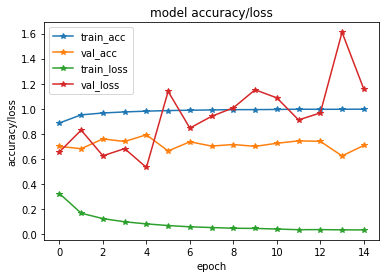


TEST_sz: 1613

Accuracy: 0.7910725356478612

              precision    recall  f1-score   support

       truth      0.790     0.846     0.817       891
       rumor      0.792     0.723     0.756       722

   micro avg      0.791     0.791     0.791      1613
   macro avg      0.791     0.785     0.787      1613
weighted avg      0.791     0.791     0.790      1613
 samples avg      0.791     0.791     0.791      1613




In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='attention').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_attention2', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (None, 120, 64)      63936       embedding_6[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_6 (Glo (None, 64)           0           bidirectional_6[0][0]            
__________________________________________________________________________________________________
global_max

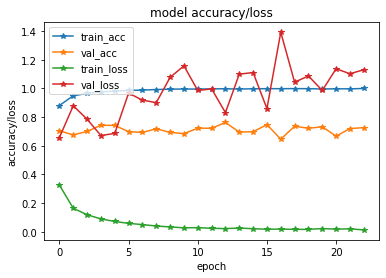


TEST_sz: 1613

Accuracy: 0.7625542467451953

              precision    recall  f1-score   support

       truth      0.739     0.882     0.804       891
       rumor      0.809     0.615     0.699       722

   micro avg      0.763     0.763     0.763      1613
   macro avg      0.774     0.749     0.751      1613
weighted avg      0.770     0.763     0.757      1613
 samples avg      0.763     0.763     0.763      1613




In [5]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='attention').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_attention3', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 120, 64)      63936       embedding_7[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_7 (Glo (None, 64)           0           bidirectional_7[0][0]            
__________________________________________________________________________________________________
global_max

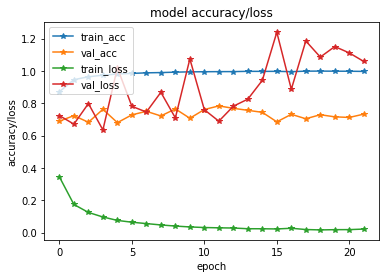


TEST_sz: 1613

Accuracy: 0.7836329820210788

              precision    recall  f1-score   support

       truth      0.784     0.840     0.811       891
       rumor      0.783     0.715     0.747       722

   micro avg      0.784     0.784     0.784      1613
   macro avg      0.784     0.777     0.779      1613
weighted avg      0.784     0.784     0.782      1613
 samples avg      0.784     0.784     0.784      1613




In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='attention').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_attention4', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 120, 64)      63936       embedding_8[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_8 (Glo (None, 64)           0           bidirectional_8[0][0]            
__________________________________________________________________________________________________
global_max

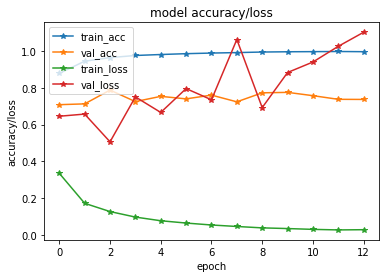


TEST_sz: 1613

Accuracy: 0.78735275883447

              precision    recall  f1-score   support

       truth      0.761     0.896     0.823       891
       rumor      0.835     0.654     0.733       722

   micro avg      0.787     0.787     0.787      1613
   macro avg      0.798     0.775     0.778      1613
weighted avg      0.795     0.787     0.783      1613
 samples avg      0.787     0.787     0.787      1613




In [7]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer(
                             'category_branch'),
                         fusion_mode='attention').model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches_attention5', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)